In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Flatten, Dense, Dropout
from keras import backend as k
import numpy as np
from keras.preprocessing import image

In [2]:
img_width,img_height=150,150

train_data_dir='content/two/train'
validation_data_dir='content/two/test'
nb_train_samples=130
nb_validation_samples=18
epochs=10
batch_size=20

In [3]:
if k.image_data_format()=='channels_first':
    input_shape=(3,img_width,img_height)
else:
    input_shape=(img_width,img_height,3)

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')
test_datagen=ImageDataGenerator(rescale=1./255)

C:\Users\abhishekd\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:1453: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


In [5]:
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=(img_width,img_height),
                                                  shuffle=True,
                                                  batch_size=batch_size,
                                                  class_mode="binary",                                                
                                                  )
validation_generator=test_datagen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  shuffle=True,
                                                  batch_size=batch_size,
                                                  class_mode="binary",                                                
                                                  )

Found 130 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [8]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [9]:
model.fit_generator(train_generator,
                   steps_per_epoch=nb_train_samples//batch_size,
                   epochs=epochs,
                   validation_data=validation_generator,
                   validation_steps=nb_validation_samples//batch_size)

C:\Users\abhishekd\AppData\Local\Temp\ipykernel_11836\726336036.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,
C:\Users\abhishekd\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\abhishekd\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:1886: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10
6/6 [==============================] - 5s 699ms/step - loss: 1.7438 - accuracy: 0.4273
Epoch 2/10
6/6 [==============================] - 3s 558ms/step - loss: 0.7028 - accuracy: 0.5000
Epoch 3/10
6/6 [==============================] - 4s 597ms/step - loss: 0.6968 - accuracy: 0.5500
Epoch 4/10
6/6 [==============================] - 4s 600ms/step - loss: 0.7049 - accuracy: 0.4545
Epoch 5/10
6/6 [==============================] - 4s 640ms/step - loss: 0.7364 - accuracy: 0.5083
Epoch 6/10
6/6 [==============================] - 3s 490ms/step - loss: 0.7082 - accuracy: 0.4909
Epoch 7/10
6/6 [==============================] - 3s 529ms/step - loss: 0.6887 - accuracy: 0.5455
Epoch 8/10
6/6 [==============================] - 3s 525ms/step - loss: 0.6585 - accuracy: 0.6545
Epoch 9/10
6/6 [==============================] - 4s 710ms/step - loss: 0.7488 - accuracy: 0.5182
Epoch 10/10
6/6 [==============================] - 4s 695ms/step - loss: 0.6816 - accuracy: 0.5364


In [10]:
model.save_weights('first_try.h5')

In [12]:
from tensorflow.keras.utils import load_img,img_to_array
img_pred= load_img('content/two/train/covid/1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg',target_size=(150,150))
img_pred= img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)
result=model.predict(img_pred)
print(result[0][0])
if result[0][0]<=0.35:
    pred="normal"
else:
    pred="Pneumonia"
print(pred)

1/1 [==============================] - 0s 168ms/step
0.9797359
Pneumonia


In [13]:
import lime
from lime import lime_image
from lime import submodular_pick

from skimage.segmentation import mark_boundaries

C:\Users\abhishekd\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
explainer = lime_image.LimeImageExplainer()

In [15]:
class_names = ['normal', 'Pneumonia']

In [16]:
from tensorflow.keras.utils import load_img,img_to_array
IMG_SIZE = (150, 150)
def transform_image(image_path, size):
    '''
    Function to transform an image to normalized numpy array
    '''
    img = load_img(image_path, target_size=size)
    img = img_to_array(img)# Transforming the image to get the shape as [channel, height, width]
    img = np.expand_dims(img, axis=0) # Adding dimension to convert array into a batch of size (1,299,299,3)
    img = img/255.0 # normalizing the image to keep within the range of 0.0 to 1.0
    
    return img

normalized_img = transform_image("content/two/test/covid/nejmoa2001191_f5-PA.jpeg", IMG_SIZE)

In [17]:
normalized_img.shape

(1, 150, 150, 3)

In [18]:
explanation = explainer.explain_instance(normalized_img[0].astype('double'), model.predict, random_seed=123)

explanation

  0%|                                                                                                                                             | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 57ms/step


  1%|█▎                                                                                                                                  | 10/1000 [00:00<00:10, 91.59it/s]

1/1 [==============================] - 0s 59ms/step


  2%|██▋                                                                                                                                 | 20/1000 [00:00<00:10, 92.30it/s]

1/1 [==============================] - 0s 50ms/step


  3%|████▏                                                                                                                              | 32/1000 [00:00<00:09, 104.24it/s]

1/1 [==============================] - 0s 49ms/step


  5%|██████▍                                                                                                                            | 49/1000 [00:00<00:07, 129.34it/s]

1/1 [==============================] - 0s 49ms/step


  6%|████████▎                                                                                                                          | 63/1000 [00:00<00:09, 101.47it/s]

1/1 [==============================] - 0s 58ms/step


  8%|██████████▌                                                                                                                         | 80/1000 [00:00<00:09, 94.01it/s]

1/1 [==============================] - 0s 58ms/step


  9%|████████████                                                                                                                        | 91/1000 [00:00<00:09, 94.94it/s]

1/1 [==============================] - 0s 56ms/step


 10%|█████████████▎                                                                                                                     | 102/1000 [00:01<00:09, 97.94it/s]

1/1 [==============================] - 0s 54ms/step


 11%|██████████████▋                                                                                                                   | 113/1000 [00:01<00:08, 100.11it/s]

1/1 [==============================] - 0s 52ms/step


 13%|████████████████▊                                                                                                                 | 129/1000 [00:01<00:07, 116.18it/s]

1/1 [==============================] - 0s 50ms/step


 14%|██████████████████▌                                                                                                                | 142/1000 [00:01<00:08, 98.78it/s]

1/1 [==============================] - 0s 54ms/step


 15%|████████████████████                                                                                                               | 153/1000 [00:01<00:08, 99.73it/s]

1/1 [==============================] - 0s 51ms/step


 16%|█████████████████████▎                                                                                                            | 164/1000 [00:01<00:08, 101.91it/s]

1/1 [==============================] - 0s 53ms/step


 18%|██████████████████████▊                                                                                                           | 175/1000 [00:01<00:08, 102.38it/s]

1/1 [==============================] - 0s 46ms/step


 19%|████████████████████████▉                                                                                                          | 190/1000 [00:01<00:08, 95.31it/s]

1/1 [==============================] - 0s 48ms/step


 21%|███████████████████████████                                                                                                       | 208/1000 [00:01<00:06, 115.68it/s]

1/1 [==============================] - 0s 53ms/step


 22%|████████████████████████████▉                                                                                                      | 221/1000 [00:02<00:07, 98.17it/s]

1/1 [==============================] - 0s 52ms/step


 24%|███████████████████████████████▍                                                                                                   | 240/1000 [00:02<00:07, 99.89it/s]

1/1 [==============================] - 0s 47ms/step


 26%|█████████████████████████████████▊                                                                                                | 260/1000 [00:02<00:07, 102.18it/s]

1/1 [==============================] - 0s 54ms/step


 27%|███████████████████████████████████▏                                                                                              | 271/1000 [00:02<00:07, 103.32it/s]

1/1 [==============================] - 0s 48ms/step


 29%|█████████████████████████████████████▌                                                                                            | 289/1000 [00:02<00:05, 120.55it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███████████████████████████████████████▌                                                                                           | 302/1000 [00:02<00:07, 97.91it/s]

1/1 [==============================] - 0s 51ms/step


 32%|████████████████████████████████████████▉                                                                                         | 315/1000 [00:03<00:06, 104.74it/s]

1/1 [==============================] - 0s 59ms/step


 33%|██████████████████████████████████████████▌                                                                                       | 327/1000 [00:03<00:06, 105.11it/s]

1/1 [==============================] - 0s 62ms/step


 34%|████████████████████████████████████████████                                                                                      | 339/1000 [00:03<00:06, 103.26it/s]

1/1 [==============================] - 0s 55ms/step


 35%|█████████████████████████████████████████████▊                                                                                     | 350/1000 [00:03<00:07, 83.95it/s]

1/1 [==============================] - 0s 72ms/step


 36%|███████████████████████████████████████████████▏                                                                                   | 360/1000 [00:03<00:07, 83.14it/s]

1/1 [==============================] - 0s 55ms/step


 37%|████████████████████████████████████████████████▍                                                                                  | 370/1000 [00:03<00:07, 85.06it/s]

1/1 [==============================] - 0s 51ms/step


 39%|██████████████████████████████████████████████████▌                                                                               | 389/1000 [00:03<00:05, 110.57it/s]

1/1 [==============================] - 0s 52ms/step


 40%|████████████████████████████████████████████████████▌                                                                              | 401/1000 [00:04<00:06, 93.36it/s]

1/1 [==============================] - 0s 52ms/step


 42%|███████████████████████████████████████████████████████                                                                            | 420/1000 [00:04<00:06, 95.96it/s]

1/1 [==============================] - 0s 52ms/step


 43%|████████████████████████████████████████████████████████▏                                                                         | 432/1000 [00:04<00:05, 101.16it/s]

1/1 [==============================] - 0s 50ms/step


 45%|██████████████████████████████████████████████████████████▏                                                                       | 448/1000 [00:04<00:04, 114.92it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████████████████████████████████████████████████████████████▍                                                                      | 461/1000 [00:04<00:05, 93.87it/s]

1/1 [==============================] - 0s 58ms/step


 47%|█████████████████████████████████████████████████████████████▊                                                                     | 472/1000 [00:04<00:05, 96.25it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████████████████████████████████████████████████████████████████▏                                                                  | 490/1000 [00:04<00:05, 94.81it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████████████████████████████████████████████████████████████████▌                                                                | 504/1000 [00:05<00:04, 104.54it/s]

1/1 [==============================] - 0s 50ms/step


 52%|████████████████████████████████████████████████████████████████████                                                               | 520/1000 [00:05<00:04, 99.07it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████████████████████████████████████████████████████████████████████▌                                                             | 531/1000 [00:05<00:04, 98.92it/s]

1/1 [==============================] - 0s 52ms/step


 54%|██████████████████████████████████████████████████████████████████████▍                                                           | 542/1000 [00:05<00:04, 101.42it/s]

1/1 [==============================] - 0s 46ms/step


 56%|████████████████████████████████████████████████████████████████████████▊                                                         | 560/1000 [00:05<00:04, 103.92it/s]

1/1 [==============================] - 0s 56ms/step


 57%|██████████████████████████████████████████████████████████████████████████▊                                                        | 571/1000 [00:05<00:04, 99.23it/s]

1/1 [==============================] - 0s 46ms/step


 59%|████████████████████████████████████████████████████████████████████████████▎                                                     | 587/1000 [00:05<00:03, 113.77it/s]

1/1 [==============================] - 0s 53ms/step


 60%|█████████████████████████████████████████████████████████████████████████████▊                                                    | 599/1000 [00:05<00:03, 114.88it/s]

1/1 [==============================] - 0s 45ms/step


 61%|████████████████████████████████████████████████████████████████████████████████                                                   | 611/1000 [00:06<00:04, 94.13it/s]

1/1 [==============================] - 0s 51ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████▌                                                | 630/1000 [00:06<00:03, 95.00it/s]

1/1 [==============================] - 0s 49ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████▏                                             | 650/1000 [00:06<00:03, 98.78it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████                                            | 662/1000 [00:06<00:03, 103.01it/s]

1/1 [==============================] - 0s 50ms/step


 68%|███████████████████████████████████████████████████████████████████████████████████████▉                                          | 676/1000 [00:06<00:02, 111.39it/s]

1/1 [==============================] - 0s 47ms/step


 69%|█████████████████████████████████████████████████████████████████████████████████████████▌                                        | 689/1000 [00:06<00:02, 115.72it/s]

1/1 [==============================] - 0s 45ms/step


 70%|███████████████████████████████████████████████████████████████████████████████████████████▉                                       | 702/1000 [00:06<00:03, 97.75it/s]

1/1 [==============================] - 0s 51ms/step


 71%|████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 714/1000 [00:07<00:02, 102.74it/s]

1/1 [==============================] - 0s 48ms/step


 73%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 728/1000 [00:07<00:02, 111.97it/s]

1/1 [==============================] - 0s 49ms/step


 74%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 740/1000 [00:07<00:02, 94.86it/s]

1/1 [==============================] - 0s 55ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 751/1000 [00:07<00:02, 97.20it/s]

1/1 [==============================] - 0s 51ms/step


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 767/1000 [00:07<00:02, 112.78it/s]

1/1 [==============================] - 0s 51ms/step


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 780/1000 [00:07<00:02, 96.79it/s]

1/1 [==============================] - 0s 56ms/step


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 791/1000 [00:07<00:02, 99.38it/s]

1/1 [==============================] - 0s 51ms/step


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 804/1000 [00:07<00:01, 106.89it/s]

1/1 [==============================] - 0s 51ms/step


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 817/1000 [00:08<00:01, 112.97it/s]

1/1 [==============================] - 0s 50ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 829/1000 [00:08<00:01, 111.74it/s]

1/1 [==============================] - 0s 48ms/step


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 841/1000 [00:08<00:01, 93.40it/s]

1/1 [==============================] - 0s 54ms/step


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 852/1000 [00:08<00:01, 97.08it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 863/1000 [00:08<00:01, 100.06it/s]

1/1 [==============================] - 0s 52ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 878/1000 [00:08<00:01, 113.38it/s]

1/1 [==============================] - 0s 52ms/step


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 890/1000 [00:08<00:01, 88.59it/s]

1/1 [==============================] - 0s 50ms/step


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 900/1000 [00:08<00:01, 90.41it/s]

1/1 [==============================] - 0s 54ms/step


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 910/1000 [00:09<00:00, 90.34it/s]

1/1 [==============================] - 0s 51ms/step


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 920/1000 [00:09<00:01, 46.74it/s]

1/1 [==============================] - 0s 51ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 935/1000 [00:09<00:01, 62.81it/s]

1/1 [==============================] - 0s 51ms/step


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 950/1000 [00:09<00:00, 68.46it/s]

1/1 [==============================] - 0s 61ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 960/1000 [00:09<00:00, 72.93it/s]

1/1 [==============================] - 0s 55ms/step


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 970/1000 [00:10<00:00, 77.55it/s]

1/1 [==============================] - 0s 56ms/step


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 980/1000 [00:10<00:00, 80.56it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 990/1000 [00:10<00:00, 85.03it/s]

1/1 [==============================] - 0s 56ms/step


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.72it/s]


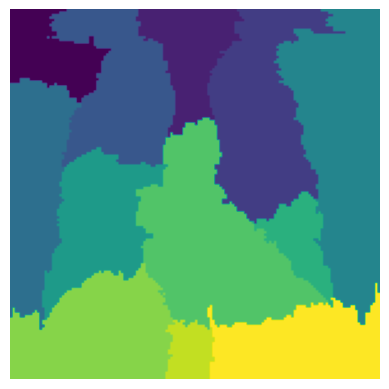

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

plt.imshow(explanation.segments)
plt.axis('off')
plt.show()

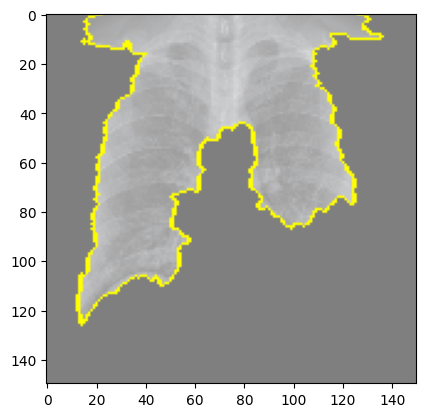

In [22]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

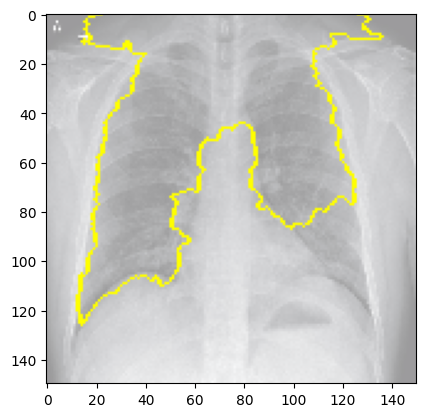

In [23]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

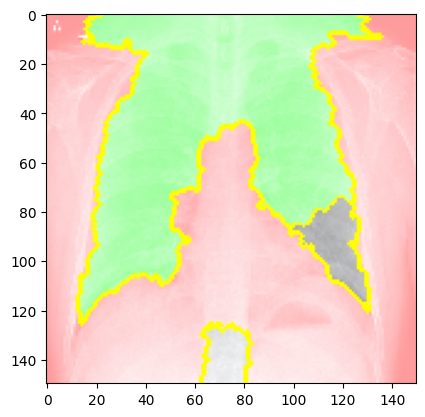

In [24]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [25]:
from tensorflow.keras.utils import load_img,img_to_array
img_pred= load_img('content/two/test/covid/nejmoa2001191_f5-PA.jpeg',target_size=(150,150))
img_pred= img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)
result=model.predict(img_pred)
print(result[0][0])
if result[0][0]<=0.35:
    pred="normal"
else:
    pred="Pneumonia"
print(pred)

1/1 [==============================] - 0s 33ms/step
0.97242844
Pneumonia


In [26]:
from tensorflow.keras.utils import load_img,img_to_array
IMG_SIZE = (150, 150)
def transform_image(image_path, size):
    '''
    Function to transform an image to normalized numpy array
    '''
    img = load_img(image_path, target_size=size)
    img = img_to_array(img)# Transforming the image to get the shape as [channel, height, width]
    img = np.expand_dims(img, axis=0) # Adding dimension to convert array into a batch of size (1,299,299,3)
    img = img/255.0 # normalizing the image to keep within the range of 0.0 to 1.0
    
    return img

normalized_img = transform_image("content/two/test/covid/nejmoa2001191_f5-PA.jpeg", IMG_SIZE)

In [27]:
explanation = explainer.explain_instance(normalized_img[0].astype('double'), model.predict, random_seed=123)

explanation

  0%|                                                                                                                                             | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 60ms/step


  1%|█▎                                                                                                                                  | 10/1000 [00:00<00:12, 80.21it/s]

1/1 [==============================] - 0s 87ms/step


  2%|██▋                                                                                                                                 | 20/1000 [00:00<00:14, 69.72it/s]

1/1 [==============================] - 0s 64ms/step


  3%|███▉                                                                                                                                | 30/1000 [00:00<00:14, 69.24it/s]

1/1 [==============================] - 0s 69ms/step


  4%|█████▎                                                                                                                              | 40/1000 [00:00<00:13, 70.14it/s]

1/1 [==============================] - 0s 66ms/step


  5%|██████▌                                                                                                                             | 50/1000 [00:00<00:13, 69.78it/s]

1/1 [==============================] - 0s 69ms/step


  6%|███████▉                                                                                                                            | 60/1000 [00:00<00:13, 69.07it/s]

1/1 [==============================] - 0s 72ms/step


  7%|█████████▏                                                                                                                          | 70/1000 [00:01<00:13, 68.92it/s]

1/1 [==============================] - 0s 65ms/step


  8%|██████████▌                                                                                                                         | 80/1000 [00:01<00:13, 68.96it/s]

1/1 [==============================] - 0s 65ms/step


  9%|███████████▉                                                                                                                        | 90/1000 [00:01<00:13, 68.83it/s]

1/1 [==============================] - 0s 69ms/step


 10%|█████████████                                                                                                                      | 100/1000 [00:01<00:13, 67.91it/s]

1/1 [==============================] - 0s 78ms/step


 11%|██████████████▍                                                                                                                    | 110/1000 [00:01<00:13, 64.57it/s]

1/1 [==============================] - 0s 86ms/step


 12%|███████████████▋                                                                                                                   | 120/1000 [00:01<00:14, 61.07it/s]

1/1 [==============================] - 0s 78ms/step


 13%|█████████████████                                                                                                                  | 130/1000 [00:01<00:14, 60.42it/s]

1/1 [==============================] - 0s 80ms/step


 14%|██████████████████▎                                                                                                                | 140/1000 [00:02<00:14, 60.02it/s]

1/1 [==============================] - 0s 79ms/step


 15%|███████████████████▋                                                                                                               | 150/1000 [00:02<00:14, 58.96it/s]

1/1 [==============================] - 0s 75ms/step


 16%|████████████████████▉                                                                                                              | 160/1000 [00:02<00:13, 61.45it/s]

1/1 [==============================] - 0s 73ms/step


 17%|██████████████████████▎                                                                                                            | 170/1000 [00:02<00:13, 61.90it/s]

1/1 [==============================] - 0s 73ms/step


 18%|███████████████████████▌                                                                                                           | 180/1000 [00:02<00:13, 62.36it/s]

1/1 [==============================] - 0s 66ms/step


 19%|████████████████████████▉                                                                                                          | 190/1000 [00:02<00:12, 64.41it/s]

1/1 [==============================] - 0s 70ms/step


 20%|██████████████████████████▏                                                                                                        | 200/1000 [00:03<00:12, 66.08it/s]

1/1 [==============================] - 0s 74ms/step


 21%|███████████████████████████▌                                                                                                       | 210/1000 [00:03<00:12, 65.52it/s]

1/1 [==============================] - 0s 71ms/step


 22%|████████████████████████████▊                                                                                                      | 220/1000 [00:03<00:11, 65.90it/s]

1/1 [==============================] - 0s 64ms/step


 23%|██████████████████████████████▏                                                                                                    | 230/1000 [00:03<00:11, 68.43it/s]

1/1 [==============================] - 0s 66ms/step


 24%|███████████████████████████████▍                                                                                                   | 240/1000 [00:03<00:11, 68.36it/s]

1/1 [==============================] - 0s 65ms/step


 25%|████████████████████████████████▊                                                                                                  | 250/1000 [00:03<00:10, 68.74it/s]

1/1 [==============================] - 0s 64ms/step


 26%|██████████████████████████████████                                                                                                 | 260/1000 [00:03<00:10, 68.69it/s]

1/1 [==============================] - 0s 63ms/step


 27%|███████████████████████████████████▎                                                                                               | 270/1000 [00:04<00:10, 69.97it/s]

1/1 [==============================] - 0s 62ms/step


 28%|████████████████████████████████████▋                                                                                              | 280/1000 [00:04<00:09, 72.51it/s]

1/1 [==============================] - 0s 61ms/step


 29%|█████████████████████████████████████▉                                                                                             | 290/1000 [00:04<00:09, 73.26it/s]

1/1 [==============================] - 0s 61ms/step


 30%|███████████████████████████████████████▎                                                                                           | 300/1000 [00:04<00:09, 72.10it/s]

1/1 [==============================] - 0s 102ms/step


 31%|████████████████████████████████████████▌                                                                                          | 310/1000 [00:04<00:10, 66.78it/s]

1/1 [==============================] - 0s 68ms/step


 32%|█████████████████████████████████████████▉                                                                                         | 320/1000 [00:04<00:10, 67.29it/s]

1/1 [==============================] - 0s 68ms/step


 33%|███████████████████████████████████████████▏                                                                                       | 330/1000 [00:04<00:09, 67.84it/s]

1/1 [==============================] - 0s 69ms/step


 34%|████████████████████████████████████████████▌                                                                                      | 340/1000 [00:05<00:09, 68.99it/s]

1/1 [==============================] - 0s 64ms/step


 35%|█████████████████████████████████████████████▊                                                                                     | 350/1000 [00:05<00:09, 71.01it/s]

1/1 [==============================] - 0s 63ms/step


 36%|███████████████████████████████████████████████▏                                                                                   | 360/1000 [00:05<00:08, 72.58it/s]

1/1 [==============================] - 0s 68ms/step


 37%|████████████████████████████████████████████████▍                                                                                  | 370/1000 [00:05<00:08, 71.89it/s]

1/1 [==============================] - 0s 69ms/step


 38%|█████████████████████████████████████████████████▊                                                                                 | 380/1000 [00:05<00:08, 70.88it/s]

1/1 [==============================] - 0s 70ms/step


 39%|███████████████████████████████████████████████████                                                                                | 390/1000 [00:05<00:08, 69.73it/s]

1/1 [==============================] - 0s 67ms/step


 40%|████████████████████████████████████████████████████▍                                                                              | 400/1000 [00:05<00:08, 69.84it/s]

1/1 [==============================] - 0s 58ms/step


 41%|█████████████████████████████████████████████████████▋                                                                             | 410/1000 [00:06<00:08, 70.99it/s]

1/1 [==============================] - 0s 69ms/step


 42%|███████████████████████████████████████████████████████                                                                            | 420/1000 [00:06<00:08, 70.94it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████████████████████████████████████████████████████████▎                                                                          | 430/1000 [00:06<00:07, 73.20it/s]

1/1 [==============================] - 0s 63ms/step


 44%|█████████████████████████████████████████████████████████▋                                                                         | 440/1000 [00:06<00:07, 74.36it/s]

1/1 [==============================] - 0s 62ms/step


 45%|██████████████████████████████████████████████████████████▉                                                                        | 450/1000 [00:06<00:07, 73.34it/s]

1/1 [==============================] - 0s 70ms/step


 46%|████████████████████████████████████████████████████████████▎                                                                      | 460/1000 [00:06<00:07, 72.50it/s]

1/1 [==============================] - 0s 64ms/step


 47%|█████████████████████████████████████████████████████████████▌                                                                     | 470/1000 [00:06<00:07, 72.14it/s]

1/1 [==============================] - 0s 59ms/step


 48%|██████████████████████████████████████████████████████████████▉                                                                    | 480/1000 [00:07<00:06, 74.88it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████████████████████████████████████████████████████████████████▏                                                                  | 490/1000 [00:07<00:06, 76.48it/s]

1/1 [==============================] - 0s 64ms/step


 50%|█████████████████████████████████████████████████████████████████▌                                                                 | 500/1000 [00:07<00:06, 74.20it/s]

1/1 [==============================] - 0s 65ms/step


 51%|██████████████████████████████████████████████████████████████████▊                                                                | 510/1000 [00:07<00:06, 75.28it/s]

1/1 [==============================] - 0s 64ms/step


 52%|████████████████████████████████████████████████████████████████████                                                               | 520/1000 [00:07<00:06, 75.31it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████████████████████████████████████████████████████████████████████▍                                                             | 530/1000 [00:07<00:06, 76.01it/s]

1/1 [==============================] - 0s 64ms/step


 54%|██████████████████████████████████████████████████████████████████████▋                                                            | 540/1000 [00:07<00:05, 77.65it/s]

1/1 [==============================] - 0s 65ms/step


 55%|████████████████████████████████████████████████████████████████████████                                                           | 550/1000 [00:07<00:05, 77.57it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████████████████████████████████████████████████████████████████████████▎                                                         | 560/1000 [00:08<00:05, 76.00it/s]

1/1 [==============================] - 0s 60ms/step


 57%|██████████████████████████████████████████████████████████████████████████▋                                                        | 570/1000 [00:08<00:05, 76.33it/s]

1/1 [==============================] - 0s 59ms/step


 58%|███████████████████████████████████████████████████████████████████████████▉                                                       | 580/1000 [00:08<00:05, 77.72it/s]

1/1 [==============================] - 0s 67ms/step


 59%|█████████████████████████████████████████████████████████████████████████████▎                                                     | 590/1000 [00:08<00:05, 75.54it/s]

1/1 [==============================] - 0s 66ms/step


 60%|██████████████████████████████████████████████████████████████████████████████▌                                                    | 600/1000 [00:08<00:05, 74.27it/s]

1/1 [==============================] - 0s 65ms/step


 61%|███████████████████████████████████████████████████████████████████████████████▉                                                   | 610/1000 [00:08<00:05, 73.66it/s]

1/1 [==============================] - 0s 64ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████▏                                                 | 620/1000 [00:08<00:05, 73.43it/s]

1/1 [==============================] - 0s 65ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████▌                                                | 630/1000 [00:08<00:05, 73.42it/s]

1/1 [==============================] - 0s 87ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████▊                                               | 640/1000 [00:09<00:05, 68.51it/s]

1/1 [==============================] - 0s 66ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████▏                                             | 650/1000 [00:09<00:05, 69.56it/s]

1/1 [==============================] - 0s 66ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████▍                                            | 660/1000 [00:09<00:04, 71.48it/s]

1/1 [==============================] - 0s 68ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████▊                                           | 670/1000 [00:09<00:04, 72.14it/s]

1/1 [==============================] - 0s 76ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████                                          | 680/1000 [00:09<00:04, 70.69it/s]

1/1 [==============================] - 0s 81ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████▍                                        | 690/1000 [00:09<00:04, 68.24it/s]

1/1 [==============================] - 0s 78ms/step


 70%|███████████████████████████████████████████████████████████████████████████████████████████▋                                       | 700/1000 [00:10<00:04, 66.82it/s]

1/1 [==============================] - 0s 76ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████                                      | 710/1000 [00:10<00:04, 64.35it/s]

1/1 [==============================] - 0s 77ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 720/1000 [00:10<00:04, 64.67it/s]

1/1 [==============================] - 0s 78ms/step


 73%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 730/1000 [00:10<00:04, 64.12it/s]

1/1 [==============================] - 0s 66ms/step


 74%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 740/1000 [00:10<00:03, 65.84it/s]

1/1 [==============================] - 0s 69ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 750/1000 [00:10<00:03, 66.60it/s]

1/1 [==============================] - 0s 69ms/step


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 760/1000 [00:10<00:03, 68.50it/s]

1/1 [==============================] - 0s 64ms/step


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 770/1000 [00:11<00:03, 70.42it/s]

1/1 [==============================] - 0s 74ms/step


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 780/1000 [00:11<00:03, 69.44it/s]

1/1 [==============================] - 0s 82ms/step


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 790/1000 [00:11<00:03, 66.32it/s]

1/1 [==============================] - 0s 78ms/step


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 800/1000 [00:11<00:03, 58.59it/s]

1/1 [==============================] - 0s 71ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 810/1000 [00:11<00:03, 60.47it/s]

1/1 [==============================] - 0s 65ms/step


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 820/1000 [00:11<00:02, 62.54it/s]

1/1 [==============================] - 0s 73ms/step


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 830/1000 [00:12<00:02, 63.74it/s]

1/1 [==============================] - 0s 74ms/step


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 840/1000 [00:12<00:02, 64.11it/s]

1/1 [==============================] - 0s 68ms/step


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 850/1000 [00:12<00:02, 65.22it/s]

1/1 [==============================] - 0s 73ms/step


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 860/1000 [00:12<00:02, 67.39it/s]

1/1 [==============================] - 0s 67ms/step


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 870/1000 [00:12<00:01, 67.32it/s]

1/1 [==============================] - 0s 85ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 880/1000 [00:12<00:01, 64.58it/s]

1/1 [==============================] - 0s 76ms/step


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 890/1000 [00:12<00:01, 63.49it/s]

1/1 [==============================] - 0s 77ms/step


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 900/1000 [00:13<00:01, 62.02it/s]

1/1 [==============================] - 0s 64ms/step


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 910/1000 [00:13<00:01, 64.98it/s]

1/1 [==============================] - 0s 62ms/step


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 920/1000 [00:13<00:01, 67.78it/s]

1/1 [==============================] - 0s 64ms/step


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 930/1000 [00:13<00:01, 69.55it/s]

1/1 [==============================] - 0s 70ms/step


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 940/1000 [00:13<00:00, 69.86it/s]

1/1 [==============================] - 0s 62ms/step


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 950/1000 [00:13<00:00, 71.72it/s]

1/1 [==============================] - 0s 66ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 960/1000 [00:13<00:00, 71.16it/s]

1/1 [==============================] - 0s 67ms/step


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 970/1000 [00:14<00:00, 70.84it/s]

1/1 [==============================] - 0s 66ms/step


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 980/1000 [00:14<00:00, 71.53it/s]

1/1 [==============================] - 0s 62ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 990/1000 [00:14<00:00, 71.05it/s]

1/1 [==============================] - 0s 67ms/step


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.80it/s]


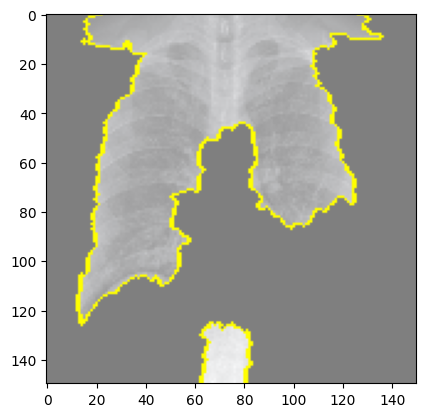

In [28]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))